In [128]:
import sys
sys.path.append('..')
sys.path.append('../analysis_util')
sys.path.append('../scrapers')
from get_file_from_s3 import read_save_s3_files, Freq

In [2]:
read_save_s3_files(file_names=['author_data', 'comment_data', 'submission_data', 'text_data'],
                   bucket='wallstreetbets',
                   start_yyyymmdd=20211106)
read_save_s3_files(file_names=['trend_data'],
                   bucket='googletrends',
                   start_yyyymmdd=20211114, freq=Freq.EVERY15MIN, force_continue=8, start_hh=6, start_mm=0)
read_save_s3_files(file_names=['stock_data'],
                   bucket='nasdaq',
                   start_yyyymmdd=20211107, freq=Freq.EVERYDAY)
read_save_s3_files(file_names=['author_data', 'comment_data', 'submission_data', 'text_data'],
                   bucket='investing',
                   start_yyyymmdd=20211110, start_hh=8)
read_save_s3_files(file_names=['author_data', 'comment_data', 'submission_data', 'text_data'],
                   bucket='stocks',
                   start_yyyymmdd=20211110, start_hh=8)

read_save_s3_files wallstreetbets
author_data


KeyboardInterrupt: 

# Concatenate files into single pandas dataframes.

In [129]:
import pandas as pd
import glob
import os

def load_csv_to_dataframe(directory = 'wallstreetbets', sub_folder = ''):
    # getting csv files from the folder MyProject
    path = os.getcwd() + f'/output/{directory}'
    if sub_folder != '':
        path += f'/{sub_folder}'

    print(path)
    # read all the files with extension .csv
    filenames = glob.glob(path + "/*.csv")
    # print('File names:', filenames)

    li = []
    for filename in filenames:
        try:
            df = pd.read_csv(filename, index_col=None, header=0, lineterminator='\r')
            li.append(df)
        except Exception as e:
            print(filename)
            
    df = pd.concat(li, axis=0, ignore_index=True)
    return df

In [130]:
google_trends = load_csv_to_dataframe(directory = 'googletrends', sub_folder = 'trend_data')
wb_author_data = load_csv_to_dataframe(directory = 'wallstreetbets', sub_folder = 'author_data')
wb_comment_data = load_csv_to_dataframe(directory = 'wallstreetbets', sub_folder = 'comment_data')
wb_submission_data = load_csv_to_dataframe(directory = 'wallstreetbets', sub_folder = 'submission_data')
wb_text_data = load_csv_to_dataframe(directory = 'wallstreetbets', sub_folder = 'text_data')

inv_author_data = load_csv_to_dataframe(directory = 'investing', sub_folder = 'author_data')
inv_comment_data = load_csv_to_dataframe(directory = 'investing', sub_folder = 'comment_data')
inv_submission_data = load_csv_to_dataframe(directory = 'investing', sub_folder = 'submission_data')
inv_text_data = load_csv_to_dataframe(directory = 'investing', sub_folder = 'text_data')

stk_author_data = load_csv_to_dataframe(directory = 'stocks', sub_folder = 'author_data')
stk_comment_data = load_csv_to_dataframe(directory = 'stocks', sub_folder = 'comment_data')
stk_submission_data = load_csv_to_dataframe(directory = 'stocks', sub_folder = 'submission_data')
stk_text_data = load_csv_to_dataframe(directory = 'stocks', sub_folder = 'text_data')


C:\Georgia Tech\6242-finance-project\notebooks/output/googletrends/trend_data
C:\Georgia Tech\6242-finance-project\notebooks/output/googletrends/trend_data\googletrends_trend_data_20211114_09_30.csv
C:\Georgia Tech\6242-finance-project\notebooks/output/googletrends/trend_data\googletrends_trend_data_20211121_07_00.csv
C:\Georgia Tech\6242-finance-project\notebooks/output/googletrends/trend_data\googletrends_trend_data_20211121_07_15.csv
C:\Georgia Tech\6242-finance-project\notebooks/output/wallstreetbets/author_data
C:\Georgia Tech\6242-finance-project\notebooks/output/wallstreetbets/comment_data
C:\Georgia Tech\6242-finance-project\notebooks/output/wallstreetbets/submission_data
C:\Georgia Tech\6242-finance-project\notebooks/output/wallstreetbets/text_data
C:\Georgia Tech\6242-finance-project\notebooks/output/investing/author_data
C:\Georgia Tech\6242-finance-project\notebooks/output/investing/comment_data
C:\Georgia Tech\6242-finance-project\notebooks/output/investing/submission_data

In [131]:
stock_data = load_csv_to_dataframe(directory = 'nasdaq', sub_folder = 'stock_data')

stock_data['update_dt'] = pd.to_datetime(stk_text_data['update_dt'], format='%Y-%m-%d')

C:\Georgia Tech\6242-finance-project\notebooks/output/nasdaq/stock_data


In [132]:
author_data = pd.concat([wb_author_data, inv_author_data, stk_author_data], axis=0, ignore_index=True)
comment_data = pd.concat([wb_comment_data, inv_comment_data, stk_comment_data], axis=0, ignore_index=True)
submission_data = pd.concat([wb_submission_data, inv_submission_data, stk_submission_data], axis=0, ignore_index=True)
text_data = pd.concat([wb_text_data, inv_text_data, stk_text_data], axis=0, ignore_index=True)
text_data.dropna(subset = ['id', 'type', 'text', 'update_dt'], inplace = True)

In [133]:
author_data['created_utc'] = pd.to_datetime(author_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
author_data['update_dt'] = pd.to_datetime(author_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

comment_data['created_utc'] = pd.to_datetime(comment_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
comment_data['update_dt'] = pd.to_datetime(comment_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

submission_data['created_utc'] = pd.to_datetime(submission_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
submission_data['update_dt'] = pd.to_datetime(submission_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

text_data['update_dt'] = pd.to_datetime(text_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

In [134]:
print('author_data', author_data.shape)
print('comment_data', comment_data.shape)
print('submission_data', submission_data.shape)
print('text_data', text_data.shape)

author_data (22988, 10)
comment_data (20306, 7)
submission_data (2755, 7)
text_data (25597, 4)


In [135]:
author_data.sort_values(by = ['author_id', 'update_dt'], inplace = True)
author_data.head()

,author_id,name,is_gold,comment_karma,link_karma,awarder_karma,awardee_karma,total_karma,created_utc,update_dt
55,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
312,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
768,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1704,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2528,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


# Check for duplicates
do not dedup authors

In [136]:
new_comment_data = comment_data.drop_duplicates(subset = ['submission_id', 'comment_id'])
print('comment_data', comment_data.shape, 'dedup:', new_comment_data.shape)

comment_data (20306, 7) dedup: (20234, 7)


In [137]:
new_submission_data = submission_data.drop_duplicates(subset = ['submission_id', 'author_id'])
print('submission_data', submission_data.shape, 'dedup:', new_submission_data.shape)

submission_data (2755, 7) dedup: (2683, 7)


In [138]:
new_text_data = text_data.drop_duplicates(subset = ['id', 'type'])
print('text_data', text_data.shape, 'dedup:', new_text_data.shape)

text_data (25597, 4) dedup: (25597, 4)


In [139]:
new_author_data = author_data.drop_duplicates(subset = ['author_id', 'update_dt'])
print('author_data', author_data.shape, 'dedup:', new_author_data.shape)
author_data = new_author_data.copy()

author_data (22988, 10) dedup: (19683, 10)


In [140]:
author_data[author_data['author_id']=='zy579']

,author_id,name,is_gold,comment_karma,link_karma,awarder_karma,awardee_karma,total_karma,created_utc,update_dt


# VaderSentiment

In [141]:
from analysis_util.sentiment import VaderSentiment

vader = VaderSentiment()
sentiment_data = vader.get_sentiment(show_text=True, dataframe= text_data)
sentiment_data

,id,type,text,negative,neutral,positive,compound
0,\nqo4gnp,title,Is 3x leverage Alphabet too retarded? GOO3,0.381,0.619,0.000,-0.5719
1,\nqo4gnp,submission,Everyone knows Google is a monopoly and the st...,0.184,0.747,0.069,-0.8718
2,\nhjkjs0s,comment,**User Report**| | | | :--|:--|:--|:-- **Tota...,0.082,0.918,0.000,-0.3612
3,\nhjkk07b,comment,"You belong here, retard.",0.531,0.469,0.000,-0.5267
4,\nhjkk22t,comment,Why not just use the 3x index ETFs?,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
25664,\nhmy7yz1,comment,Put it in stocks but forget about the ring part.,0.207,0.793,0.000,-0.3291
25665,\nhmycyjz,comment,Get a ring from a pawn shop and save money.,0.000,0.686,0.314,0.4939
25666,\nhmy8hoa,comment,Don't put it in stocks unless you want to take...,0.080,0.871,0.049,-0.2023
25667,\nhmy9hex,comment,"Six months is *very* short term, you'd be taki...",0.038,0.962,0.000,-0.2732


Text(0.5, 0, 'Data')

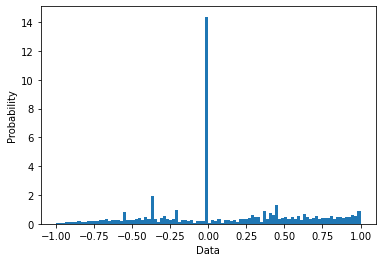

In [142]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = sentiment_data['compound']

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

In [143]:
sentiment_data = sentiment_data[sentiment_data['type'].isin(['submission', 'comment'])].copy()

In [144]:
sentiment_data.loc[(sentiment_data['compound']>-0.3)&(sentiment_data['compound']<0.3), 'sentiment'] = 'neutral'

sentiment_data.loc[(sentiment_data['compound']>=0.3), 'sentiment'] = 'positive'

sentiment_data.loc[(sentiment_data['compound']<=-0.3), 'sentiment'] = 'negative'

In [145]:
sentiment_data['sentiment'].value_counts()

neutral     9745
positive    8204
negative    4966
Name: sentiment, dtype: int64

### VADER Validation using AWS Comprehend Sentiment

In [68]:
from analysis_util.sentiment import AwsComprehendSentiment

comprehend = AwsComprehendSentiment()

In [69]:
#
# WARNING: TAKES A LONG TIME TO EXECUTE
#
sentiment_data_validation = comprehend.get_sentiment(dataframe= text_data) #

sentiment_data_validation.head()

Exception 'body'
Exception 'body'


KeyboardInterrupt: 

In [70]:
np.random.seed(42)
x = sentiment_data_validation['compound']

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

NameError: name 'sentiment_data_validation' is not defined

In [28]:
sentiment_data.loc[(sentiment_data['neutral']>sentiment_data['negative']) & 
                   (sentiment_data['neutral']>sentiment_data['positive']), 'sentiment'] = 'neutral'
sentiment_data.loc[(sentiment_data['positive']>sentiment_data['negative']) & 
                   (sentiment_data['positive']>sentiment_data['neutral']), 'sentiment'] = 'positive'
sentiment_data.loc[(sentiment_data['negative']>sentiment_data['neutral']) & 
                   (sentiment_data['negative']>sentiment_data['positive']), 'sentiment'] = 'negative'

In [146]:
sentiment_data['sentiment'].value_counts()

neutral     9745
positive    8204
negative    4966
Name: sentiment, dtype: int64

In [ ]:
sentiment_data_validation.loc[
    (sentiment_data_validation['neutral']>sentiment_data_validation['negative']) & 
    (sentiment_data_validation['neutral']>sentiment_data_validation['positive']), 'sentiment_comprehend'] = 'neutral'

sentiment_data_validation.loc[
    (sentiment_data_validation['positive']>sentiment_data_validation['negative']) & 
    (sentiment_data_validation['positive']>sentiment_data_validation['neutral']), 'sentiment_comprehend'] = 'positive'

sentiment_data_validation.loc[
    (sentiment_data_validation['negative']>sentiment_data_validation['positive']) & 
    (sentiment_data_validation['negative']>sentiment_data_validation['neutral']), 'sentiment_comprehend'] = 'negative'

sentiment_data_validation['sentiment_comprehend'].value_counts()

In [ ]:
x = sentiment_data.merge(sentiment_data_validation, on=['id', 'type'])
display(x)

In [ ]:
x[x['sentiment'] != x['sentiment_comprehend']][-50:]

In [ ]:
percent_non_matching = len(x[x['sentiment'] != x['sentiment_comprehend']])/len(x)
percent_non_matching

# TickersMining

In [147]:
from mining import TickersMining

miner = TickersMining(stock_data='input/stock_data.csv')

ticker_data = miner.get_tickers(dataframe=text_data)

ticker_data.head()

,id,type,tickers
0,\nqo4gnp,title,
1,\nqo4gnp,submission,GOOG
2,\nhjkjs0s,comment,
3,\nhjkk07b,comment,
4,\nhjkk22t,comment,


In [148]:
ticker_data = ticker_data[(ticker_data['tickers'].notnull()) & (ticker_data['tickers']!="")]
ticker_data['tickers_list'] = ticker_data['tickers'].str.split('|')
ticker_data = ticker_data.explode('tickers_list').reset_index(drop=True)

ticker_data.rename(columns={"tickers_list": "ticker"}, inplace = True)

In [149]:
print('df_ticker_data_notnull', ticker_data.shape)
ticker_data.head()


df_ticker_data_notnull (10006, 4)


,id,type,tickers,ticker
0,\nqo4gnp,submission,GOOG,GOOG
1,\nqo3u6q,submission,IRS|RH,IRS
2,\nqo3u6q,submission,IRS|RH,RH
3,\nhjkft58,comment,GO,GO
4,\nqo6px6,submission,MLI|PB,MLI


In [150]:
import numpy as np
unique_tickers = list(np.unique(ticker_data.ticker))

print('number of unique tickers:', len(unique_tickers))

number of unique tickers: 1182


# submission data: Concat Submission and comments

In [151]:
df_submission_1 = submission_data.copy()
df_submission_1 = df_submission_1[['submission_id', 'author_id', 'score', 'created_utc', 'update_dt']]

df_submission_1.rename(columns={'submission_id': 'id'}, inplace = True)

df_submission_1['type'] = 'submission'

In [152]:
df_submission_2 = comment_data.copy()
df_submission_2 = df_submission_2[['comment_id', 'author_id', 'score', 'created_utc', 'update_dt']]

df_submission_2.rename(columns={'comment_id': 'id'}, inplace = True)

df_submission_2['type'] = 'comment'

In [153]:
submission_comment_data = pd.concat([df_submission_1, df_submission_2], ignore_index=True)

# All in: Join Sentiment , submission/comment, ticker data and author data

In [215]:
sentiment_data.replace('\n','', regex=True, inplace=True)
ticker_data.replace('\n','', regex=True, inplace=True)
author_data.replace('\n','', regex=True, inplace=True)
submission_comment_data.replace('\n','', regex=True, inplace=True)


In [216]:
sentiment_data['sentiment'].value_counts()

neutral     9745
positive    8204
negative    4966
Name: sentiment, dtype: int64

In [217]:
sentiment_data.head()

,id,type,text,negative,neutral,positive,compound,sentiment
0,qo4gnp,submission,Everyone knows Google is a monopoly and the st...,0.184,0.747,0.069,-0.8718,negative
1,hjkjs0s,comment,**User Report**| | | | :--|:--|:--|:-- **Tota...,0.082,0.918,0.000,-0.3612,negative
2,hjkk07b,comment,"You belong here, retard.",0.531,0.469,0.000,-0.5267,negative
3,hjkk22t,comment,Why not just use the 3x index ETFs?,0.000,1.000,0.000,0.0000,neutral
4,hjklona,comment,Why can’t you just buy fds like a normal person,0.000,0.762,0.238,0.3612,positive


In [218]:
ticker_data.head()

,id,type,tickers,ticker
0,qo4gnp,submission,GOOG,GOOG
1,qo3u6q,submission,IRS|RH,IRS
2,qo3u6q,submission,IRS|RH,RH
3,hjkft58,comment,GO,GO
4,qo6px6,submission,MLI|PB,MLI


In [219]:
author_data.dropna(inplace=True)
author_data.head()

,author_id,name,is_gold,comment_karma,link_karma,awarder_karma,awardee_karma,total_karma,created_utc,update_dt
0,100cej,SQRTLURFACE,True,36042.0,227.0,761.0,181.0,37211.0,2016-08-01 06:54:28,2021-11-10 03:00:00
1,1019wg,shawmahawk,False,10931.0,1476.0,44.0,661.0,13112.0,2016-08-01 21:46:32,2021-11-09 05:00:00
2,101di1,Many-machines-on-ix,False,258.0,556.0,77.0,68.0,959.0,2016-08-01 22:59:11,2021-11-27 14:00:00
3,102k1d,JRMang,True,109510.0,18582.0,1008.0,3019.0,132119.0,2016-08-02 18:37:53,2021-11-12 17:00:00
4,102k1d,JRMang,True,109760.0,18582.0,1027.0,3019.0,132388.0,2016-08-02 18:37:53,2021-11-18 05:00:00


In [220]:
submission_comment_data.dropna(inplace=True)
submission_comment_data.head()

,id,author_id,score,created_utc,update_dt,type
0,qo4gnp,845k3tg2,4.0,2021-11-06 17:01:17,2021-11-06 17:00:00,submission
1,qo3u6q,8spa6hs8,38.0,2021-11-06 16:29:41,2021-11-06 17:00:00,submission
2,qo6px6,3jrwyqto,3.0,2021-11-06 18:54:19,2021-11-06 19:00:00,submission
3,qo6219,45ffug98,51.0,2021-11-06 18:20:41,2021-11-06 19:00:00,submission
4,qo5mlh,9v2gh7xx,39.0,2021-11-06 17:59:50,2021-11-06 19:00:00,submission


In [221]:
flatten_data = sentiment_data.merge(ticker_data, on=['id', 'type'])

In [222]:
flatten_data = flatten_data.merge(submission_comment_data, on=['id', 'type'])

Traceback (most recent call last):
  File "_pydevd_bundle\pydevd_cython_win32_39_64.pyx", line 1035, in _pydevd_bundle.pydevd_cython_win32_39_64.PyDBFrame.trace_dispatch
  File "C:\Users\nlisichenok\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\213.5744.248\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 144, in cmd_step_over
    if _is_inside_jupyter_cell(frame, pydb):
  File "C:\Users\nlisichenok\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\213.5744.248\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 209, in _is_inside_jupyter_cell
    if is_cell_filename(filename):
  File "C:\Users\nlisichenok\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\213.5744.248\plugins\python\helpers-pro\jupyter_debug\pydev_jupyter_plugin.py", line 220, in is_cell_filename
    ipython_shell = get_ipython()
NameError: name 'get_ipython' is not defined


In [223]:
flatten_data = flatten_data.merge(author_data, on=['author_id', 'update_dt'])

In [224]:
cols = [
'id',
'type',
'negative', 
'neutral', 
'positive', 
'compound', 
'sentiment', 
'ticker', 
'author_id',
'score',
'created_utc_x',
'update_dt',
'comment_karma',
'link_karma',
'awarder_karma',
'awardee_karma',
'total_karma'
]
flatten_data = flatten_data[cols]

flatten_data.rename(columns={'created_utc_x': 'created_utc'}, inplace = True)

flatten_data.to_csv(path_or_buf=f'output/backup4/flatten_data.csv', encoding='utf-8', index=False)

# Yahoo hourly price with Sentiment

In [171]:
# get sentiments agg by hour

import pandas as pd
import numpy as np

flatten_data = pd.read_csv(f'output/backup/flatten_data.csv', index_col=None, header=0)
df_sentiment_temp = flatten_data.copy()
df_sentiment_temp['created_utc'] = pd.to_datetime(df_sentiment_temp['created_utc'])
df_sentiment_temp['Date'] = df_sentiment_temp['created_utc'].dt.ceil('h')
sentiment_dummies = pd.get_dummies(df_sentiment_temp['sentiment'], prefix= 'sent')
df_sentiment_temp = pd.concat([df_sentiment_temp, sentiment_dummies], axis=1)  

df_sentiment_temp = df_sentiment_temp[['ticker', 'Date', 'sent_negative', 'sent_neutral', 'sent_positive']]
df_sentiment_agg = df_sentiment_temp.groupby(['ticker', 'Date']).sum().reset_index()
df_sentiment_agg.rename(columns={'ticker': 'Ticker'}, inplace = True)
df_sentiment_agg['mentions'] = df_sentiment_agg.sent_negative + df_sentiment_agg.sent_neutral + df_sentiment_agg.sent_positive

df_sentiment_agg['Date'] = df_sentiment_agg['Date'].dt.tz_localize('UTC')#.dt.tz_convert('America/New_York')


In [172]:
df_sentiment_agg['origin'] = pd.Timestamp("1970-01-01", tz = 'UTC')
df_sentiment_agg['timestamp'] = (df_sentiment_agg['Date'] - df_sentiment_agg['origin'] )
df_sentiment_agg['timestamp'] = df_sentiment_agg['timestamp'].values.astype(int)

del df_sentiment_agg['origin'] 
del df_sentiment_agg['Date'] 

In [173]:
# get all the mentionned tickers in reddit
reddit_tickers = list(np.unique(df_sentiment_agg['Ticker']))

In [174]:
df_sentiment_agg.head()

,Ticker,sent_negative,sent_neutral,sent_positive,mentions,timestamp
0,AA,0,1,0,1,349388800
1,AA,0,1,0,1,277667840
2,AA,0,1,0,1,-762019840
3,AA,0,1,0,1,1231290368
4,AAL,0,1,0,1,1726005248


In [175]:
# retrieve all the hourly closing prices for each ticker
import yfinance as yf
print(yf.__version__)

prices = []
i=0
while i< len(reddit_tickers):
    start = i
    end = i+100
    if end>len(reddit_tickers):
        end = len(reddit_tickers)
    
    data = yf.download( tickers = reddit_tickers[start:end], period = "1mo",interval = "1h",group_by = 'ticker', 
                       auto_adjust = True, prepost = True, threads = True, proxy = None)
    
#     data = yf.download(tickers=reddit_tickers[i], period="1mo", interval="1h",prepost = True)
    data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
    data.reset_index(inplace = True)
#     print(data.shape)
    prices.append(data)
#     i = i+1
    i = i+100

0.1.64
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed

1 Failed download:
- EMP: None
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  100 of 100 completed
[*********************100%***********************]  98 of 98 completed


In [176]:
price_data = pd.concat(prices, ignore_index=True)
price_data['Date'] = price_data['Date'].dt.tz_convert('UTC')

price_data['origin'] = pd.Timestamp("1970-01-01", tz = 'UTC')
price_data['timestamp'] = (price_data['Date'] - price_data['origin'] )
price_data['timestamp'] = price_data['timestamp'].values.astype(int)

del price_data['origin'] 

price_data = price_data[['timestamp','Ticker', 'Close']]


In [177]:
price_data.head()

,timestamp,Ticker,Close
0,471314432,AA,47.669399
1,471314432,AAL,20.455000
2,471314432,AAON,71.620003
3,471314432,AAP,229.500000
4,471314432,AAPL,150.559998


In [178]:
## All datetimes per tickers (after market hours and week ends)
import datetime

numhours = 30*24

base = datetime.datetime.today()
date_list = [base - datetime.timedelta(hours=x) for x in range(numhours)]
df_date_time = pd.DataFrame({'Date': date_list})
df_date_time['Date'] = df_date_time['Date'].dt.floor('h')
df_date_time['Date'] = df_date_time['Date'].dt.tz_localize('UTC')#.dt.tz_convert('America/New_York')

df_reddit_tickers  = pd.DataFrame({'Ticker': reddit_tickers})

df_date_time['origin'] = pd.Timestamp("1970-01-01", tz = 'UTC')
df_date_time['timestamp'] = (df_date_time['Date'] - df_date_time['origin'] )
df_date_time['timestamp'] = df_date_time['timestamp'].values.astype(int)

del df_date_time['origin'] 

df_date_time['key'] = 0
df_reddit_tickers['key'] = 0


df_reddit_tickers_time = df_date_time.merge(df_reddit_tickers,  on='key', how='outer') #cross join
df_reddit_tickers_time = df_reddit_tickers_time[['Date', 'timestamp', 'Ticker']].copy()

In [179]:
df_date_time.dtypes


Date         datetime64[ns, UTC]
timestamp                  int32
key                        int64
dtype: object

In [180]:
# price_data: fill up the missing hours(after hours and weekends/holiday)
price_data_all = df_reddit_tickers_time.merge(price_data, on=['timestamp', 'Ticker'], how = 'left')


In [181]:
df_sentiment_agg.head()

,Ticker,sent_negative,sent_neutral,sent_positive,mentions,timestamp
0,AA,0,1,0,1,349388800
1,AA,0,1,0,1,277667840
2,AA,0,1,0,1,-762019840
3,AA,0,1,0,1,1231290368
4,AAL,0,1,0,1,1726005248


In [182]:
# get the sentiment data on the price data
sentiment_price_data = price_data_all.merge(df_sentiment_agg, on=['timestamp', 'Ticker'], how = 'left')
sentiment_price_data = sentiment_price_data[['Date', 'Ticker', 'Close', 'sent_negative', 'sent_neutral', 'sent_positive', 'mentions']].copy()

sentiment_price_data[['sent_negative','sent_neutral','sent_positive','mentions']] = sentiment_price_data[['sent_negative','sent_neutral','sent_positive','mentions']].fillna(value=0)

# df_sentiment_price.fillna(0, inplace = True)


In [183]:
sentiment_price_data.shape

(790560, 7)

In [184]:
sentiment_price_data.dtypes

Date             datetime64[ns, UTC]
Ticker                        object
Close                        float64
sent_negative                float64
sent_neutral                 float64
sent_positive                float64
mentions                     float64
dtype: object

# Save the imported data for Future re-use (backup)
so you don't have to reload the data from S3 every time you restart the notebook

In [185]:
outdir = f'output/backup4'
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [186]:
sentiment_price_data.to_csv(path_or_buf=f'{outdir}/sentiment_price_data.csv', encoding='utf-8', index=False)


In [187]:
sentiment_price_data.dtypes

Date             datetime64[ns, UTC]
Ticker                        object
Close                        float64
sent_negative                float64
sent_neutral                 float64
sent_positive                float64
mentions                     float64
dtype: object

In [188]:

    
# path_to_save = f'output/{bucket}/{f}/{bucket}_{f}_{yyyymmdd_hh_mm}.csv'
# df.to_csv(path_or_buf=path_to_save, encoding='utf-8', index=False)

author_data.to_csv(path_or_buf=f'{outdir}/author_data.csv', encoding='utf-8', index=False)
comment_data.to_csv(path_or_buf=f'{outdir}/comment_data.csv', encoding='utf-8', index=False)
submission_data.to_csv(path_or_buf=f'{outdir}/submission_data.csv', encoding='utf-8', index=False)
text_data.to_csv(path_or_buf=f'{outdir}/text_data.csv', encoding='utf-8', index=False)
sentiment_data.to_csv(path_or_buf=f'{outdir}/sentiment_data.csv', encoding='utf-8', index=False)
ticker_data.to_csv(path_or_buf=f'{outdir}/ticker_data.csv', encoding='utf-8', index=False)

submission_comment_data.to_csv(path_or_buf=f'{outdir}/submission_comment_data.csv', encoding='utf-8', index=False)
flatten_data.to_csv(path_or_buf=f'{outdir}/flatten_data.csv', encoding='utf-8', index=False)

sentiment_price_data.to_csv(path_or_buf=f'{outdir}/sentiment_price_data.csv', encoding='utf-8', index=False)



In [189]:
author_data = pd.read_csv(f'{outdir}/author_data.csv', index_col=None, header=0)
comment_data = pd.read_csv(f'{outdir}/comment_data.csv', index_col=None, header=0)
submission_data = pd.read_csv(f'{outdir}/submission_data.csv', index_col=None, header=0)
text_data = pd.read_csv(f'{outdir}/text_data.csv', index_col=None, header=0)
sentiment_data = pd.read_csv(f'{outdir}/sentiment_data.csv', index_col=None, header=0)
ticker_data = pd.read_csv(f'{outdir}/ticker_data.csv', index_col=None, header=0)
submission_comment_data = pd.read_csv(f'{outdir}/submission_comment_data.csv', index_col=None, header=0)
flatten_data = pd.read_csv(f'{outdir}/flatten_data.csv', index_col=None, header=0)



author_data['created_utc'] = pd.to_datetime(author_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
author_data['update_dt'] = pd.to_datetime(author_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

comment_data['created_utc'] = pd.to_datetime(comment_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
comment_data['update_dt'] = pd.to_datetime(comment_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

submission_data['created_utc'] = pd.to_datetime(submission_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
submission_data['update_dt'] = pd.to_datetime(submission_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

text_data['update_dt'] = pd.to_datetime(text_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

submission_comment_data['created_utc'] = pd.to_datetime(submission_comment_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
submission_comment_data['update_dt'] = pd.to_datetime(submission_comment_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

flatten_data['created_utc'] = pd.to_datetime(flatten_data['created_utc'], format='%Y-%m-%d %H:%M:%S')
flatten_data['update_dt'] = pd.to_datetime(flatten_data['update_dt'], format='%Y-%m-%d %H:%M:%S')

sentiment_price_data = pd.read_csv(f'{outdir}/sentiment_price_data.csv', index_col=None, header=0)
sentiment_price_data['Date'] = pd.to_datetime(sentiment_price_data['Date'], format='%Y-%m-%d %H:%M:%S')
sentiment_price_data['Date'] = sentiment_price_data['Date'].dt.tz_convert('America/New_York')



In [190]:
sentiment_price_data.dtypes

Date             datetime64[ns, America/New_York]
Ticker                                     object
Close                                     float64
sent_negative                             float64
sent_neutral                              float64
sent_positive                             float64
mentions                                  float64
dtype: object